# Iris classification Project

### Importing the data and visualize structure

In [1]:
from sklearn.datasets import load_iris
import numpy as np
iris_dataset = load_iris() # data type returned is a Bunch objet - similar to dictionarries
keys = iris_dataset.keys()
print(keys)

print()
print("The iris dataset has {} different classes".format(len(iris_dataset["target_names"])))
print("Class names are: {}".format(iris_dataset["target_names"]))
print("The shape of the data is: {}".format(np.shape(iris_dataset["data"]))) # 150 samples, 4 features 
print("The four features extracted are: {}".format(iris_dataset["feature_names"]))

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

The iris dataset has 3 different classes
Class names are: ['setosa' 'versicolor' 'virginica']
The shape of the data is: (150, 4)
The four features extracted are: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Data visualization

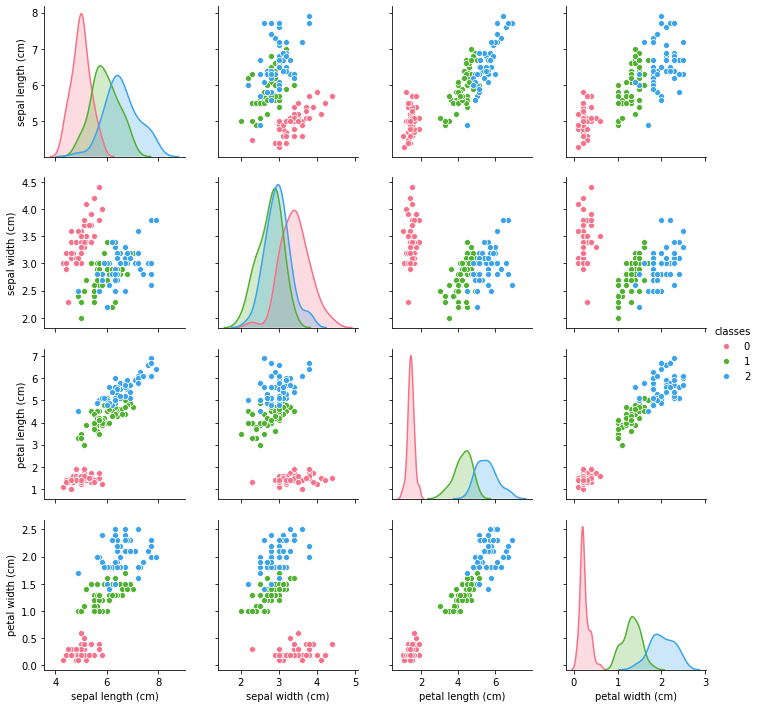

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(iris_dataset["data"], columns=iris_dataset["feature_names"])
df["classes"] = iris_dataset["target"]

gr = sns.pairplot(df, hue="classes", vars=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"],\
                 palette="husl")


### Create training and testing sets

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset["data"], iris_dataset["target"],\
                                                    test_size=0.25, shuffle=True)

print("Train set shape: {}".format(np.shape(X_train)))
print("Test set shape: {}".format(np.shape(X_test)))
print()

count_train_classes = [0,0,0]
count_test_classes = [0,0,0]
for i,val in enumerate(iris_dataset["target_names"]):
    count_train_classes[i] = list(y_train).count(i)
    count_test_classes[i] = list(y_test).count(i)

for i in range(len(iris_dataset["target_names"])):
    
    print("Class \"{}\" represent {}% of train set and {}% of test set".format(iris_dataset["target_names"][i],\
                                                       round(count_train_classes[i]*100/len(y_train),2),\
                                                                              round(count_test_classes[i]*100/len(y_test),2)))



Train set shape: (112, 4)
Test set shape: (38, 4)

Class "setosa" represent 33.93% of train set and 31.58% of test set
Class "versicolor" represent 33.04% of train set and 34.21% of test set
Class "virginica" represent 33.04% of train set and 34.21% of test set


### Creating model: k-nearest neighbors